#### Задание 1

##### 0. Сгенерировать наборы данных

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcollections import SortedList

In [5]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [6]:
datasetCircle = make_circles(n_samples=200, 
                                noise=0.1,
                                factor=0.4)

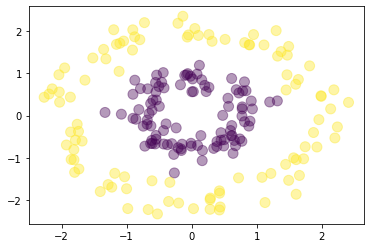

In [7]:
circleX, circleY = datasetCircle
circleX = np.array(circleX)*2
plt.scatter(circleX[:,0], circleX[:, 1], s=100, c=-circleY, alpha=0.4)


In [5]:
datasetBlobs = make_blobs(n_samples=100, 
                            centers=2, 
                            n_features=2, 
                            center_box=(-100, 100), 
                            cluster_std=15, 
                            random_state=1)

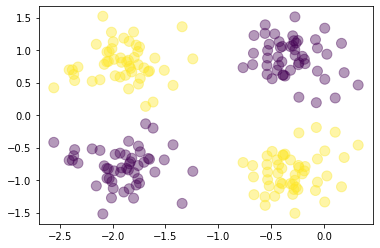

In [6]:
blobsX, blobsY = datasetBlobs
blobsX = np.array(blobsX)/50
blobsY = np.array(blobsY)

blobsX = np.array(np.append(blobsX, blobsX*[1, -1])).reshape((-1,2))
blobsY = np.array(np.append(np.zeros(blobsY.shape), np.ones(blobsY.shape)))
plt.scatter(blobsX[:,0], blobsX[:, 1], s=100, c=blobsY, alpha=0.4)

In [7]:
datasetMoons = make_moons(n_samples=250)


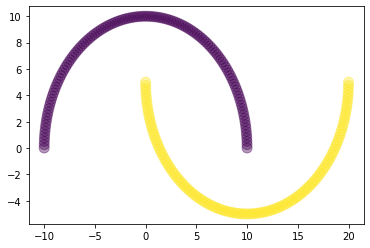

In [8]:
moonsX, moonsY = datasetMoons
moonsX = np.array(moonsX)*10
moonsY = np.array(moonsY)
plt.scatter(moonsX[:,0], moonsX[:, 1], s=100, c=moonsY, alpha=0.4)

##### 1.1. Обучить и протестировать KNN

In [9]:
class KNN:
  
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    y = np.zeros(len(X))

    for i, x in enumerate(X):  
      sl = SortedList()
      for j, x_train in enumerate(self.X):
        diff = x - x_train  
        d = diff.dot(diff)  # Euclidian distance
        if (len(sl) < self.k):
          sl.add( (d, self.y[j]) )
        else:
          if (d < sl[-1][0] ):
            del sl[-1]
            sl.add( (d, self.y[j]) )

      votes = {}
      for _, v in sl:
          votes[v] = votes.get(v, 0) + 1
      
      max_votes = 0
      max_votes_class = -1
      for v, count in votes.items():
          if count > max_votes:
              max_votes = count
              max_votes_class = v
      y[i] = max_votes_class
    return y
        
  def score(self, X, y):
    P = self.predict(X)
    return np.mean(P == y)

##### 1.2. Построить графики точности (train/test) при разных k (1...8)

In [10]:
prepearedDataset = [[circleX, circleY],[blobsX, blobsY], [moonsX, moonsY]]
setSizeKoefRange = np.arange(0.1, 1, 0.1)
totalResults = []
for iDataset, data in enumerate(prepearedDataset):
    X, Y = data
    datasetResult = []
    for iTrainToTestKoef in setSizeKoefRange:
        datasetResult.append([])

    for iTrainToTestKoef, trainToTestKoef in enumerate(setSizeKoefRange):
        nTrain = int(len(X) * trainToTestKoef)
        X_train, y_train = X[:nTrain], Y[:nTrain]
        X_test, y_test = X[nTrain:], Y[nTrain:]
        result = []
        for ik in np.arange(1, 9):
            model = KNN(k=ik)
            model.fit(X_train, y_train)
            trainMean = 1 - model.score(X_train, y_train)
            testMean = 1 - model.score(X_test, y_test)
            print(f"Dataset {iDataset}: K={ik}, koef={trainToTestKoef}, training error={trainMean}, validation error={testMean}")
            datasetResult[iTrainToTestKoef].append([trainMean, testMean])
    totalResults.append(datasetResult)
totalResults = np.array(totalResults)

Dataset 0: K=1, koef=0.1, training error=0.0, validation error=0.18888888888888888
Dataset 0: K=2, koef=0.1, training error=0.0, validation error=0.18888888888888888
Dataset 0: K=3, koef=0.1, training error=0.09999999999999998, validation error=0.35
Dataset 0: K=4, koef=0.1, training error=0.050000000000000044, validation error=0.30000000000000004
Dataset 0: K=5, koef=0.1, training error=0.09999999999999998, validation error=0.4222222222222223
Dataset 0: K=6, koef=0.1, training error=0.09999999999999998, validation error=0.4
Dataset 0: K=7, koef=0.1, training error=0.15000000000000002, validation error=0.4277777777777778
Dataset 0: K=8, koef=0.1, training error=0.09999999999999998, validation error=0.4222222222222223
Dataset 0: K=1, koef=0.2, training error=0.0, validation error=0.05625000000000002
Dataset 0: K=2, koef=0.2, training error=0.0, validation error=0.05625000000000002
Dataset 0: K=3, koef=0.2, training error=0.025000000000000022, validation error=0.13124999999999998
Dataset

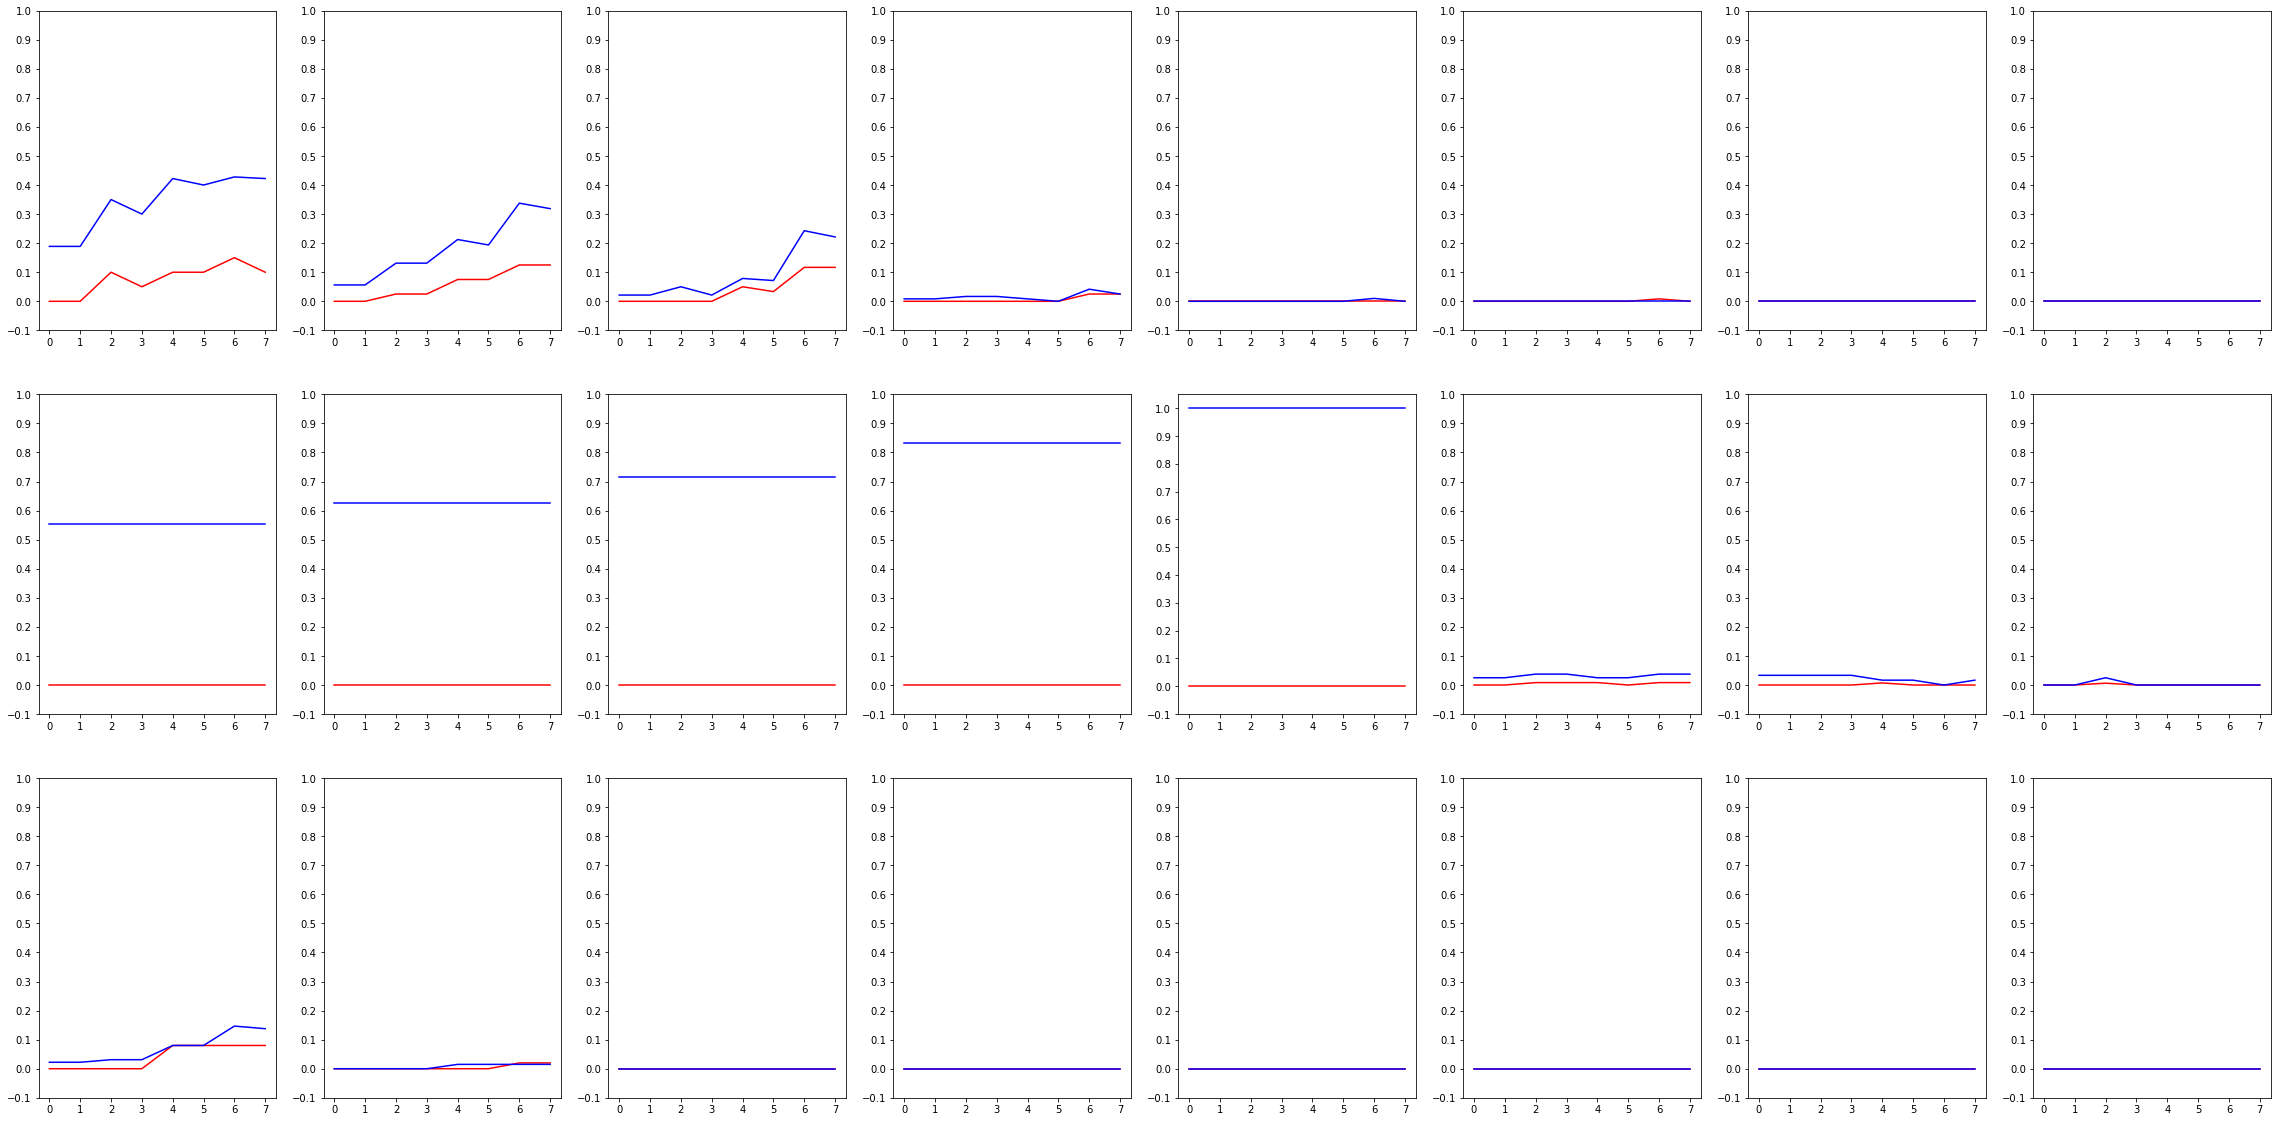

In [11]:
total = 1
for x in totalResults.shape[:-2]:
    total*=x
colInRow = 8
fig, axes = plt.subplots(round(total / colInRow), colInRow, figsize=(40, 20))

i = 0
for datasetResult in totalResults:
    axs = axes[i]
    i+=1
    for ix, ax in enumerate(axs):
        ax.plot(np.array(datasetResult)[ix,:,0], c="red")
        ax.plot(np.array(datasetResult)[ix,:,1], c="blue")
        ax.set_yticks(np.arange(-0.1, 1.05, 0.1))
        ax.set_xticks(np.arange(0, 8, 1))

##### 1.3. Построить границы классов

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
X, Y = prepearedDataset[0]
model = KNN(k=3)
model.fit(X, Y)
plot_decision_regions(X, np.array(Y, dtype=np.int0), clf=model, legend=2)

NameError: name 'prepearedDataset' is not defined

<AxesSubplot:>

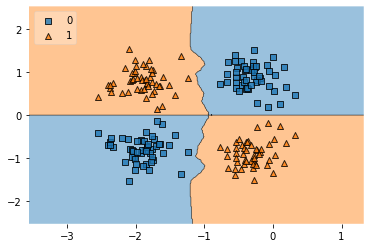

In [14]:
X, Y = prepearedDataset[1]
model = KNN(k=3)
model.fit(X, Y)
plot_decision_regions(X, np.array(Y, dtype=np.int0), clf=model, legend=2)

<AxesSubplot:>

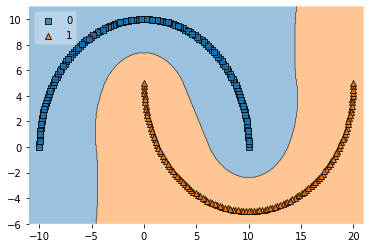

In [15]:
X, Y = prepearedDataset[2]
model = KNN(k=3)
model.fit(X, Y)
plot_decision_regions(X, np.array(Y, dtype=np.int0), clf=model, legend=2)

###### слишком долго

fig, axes = plt.subplots(round(total / colInRow), colInRow, figsize=(40, 20))

i = 0
for iDataset, data in enumerate(prepearedDataset):
    X, Y = data
    axs = axes[i]
    i+=1
    for ik in np.arange(1, 9):
        model = KNN(k=ik)
        model.fit(X_train, y_train)

        plot_decision_regions(X, Y, clf=model, legend=2, ax=axs[ik-1])

#### Задание 2 Переписать класс KNN, заменим операции в цикле на векторные вычисления (используйте библиотеку numpy)

In [74]:
class KNNvectorize:
  
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    y = np.zeros(len(X))
    mxE = np.ones(self.X.shape).T
    votesIterator = np.arange(self.k)
    for i, x in enumerate(X):
        x_current = np.zeros(self.X.shape) + x
        d = np.subtract(self.X, x_current)
        d2 = d * d
        dist = np.diag(d2.dot(mxE))
        
        votes = {}
        for ik in votesIterator:
          imax = np.argmin(dist)
          v = self.y[imax]
          votes[v] = votes.get(v, 0) + 1
          dist[imax] = np.int32.max

        max_votes, max_votes_class = 0, -1
        for v, count in votes.items():
            if count > max_votes:
                max_votes, max_votes_class = count, v
        y[i] = max_votes_class
    return y
        
  def score(self, X, y):
    P = self.predict(X)
    return np.mean(P == y)

In [75]:
prepearedDataset = [[circleX, circleY],[blobsX, blobsY], [moonsX, moonsY]]
setSizeKoefRange = np.arange(0.1, 1, 0.1)
totalResults = []
for iDataset, data in enumerate(prepearedDataset):
    X, Y = data
    datasetResult = []
    for iTrainToTestKoef in setSizeKoefRange:
        datasetResult.append([])

    for iTrainToTestKoef, trainToTestKoef in enumerate(setSizeKoefRange):
        nTrain = int(len(X) * trainToTestKoef)
        X_train, y_train = X[:nTrain], Y[:nTrain]
        X_test, y_test = X[nTrain:], Y[nTrain:]
        result = []
        for ik in np.arange(1, 9):
            model = KNNvectorize(k=ik)
            model.fit(X_train, y_train)
            trainMean = 1 - model.score(X_train, y_train)
            testMean = 1 - model.score(X_test, y_test)
            print(f"Dataset {iDataset}: K={ik}, koef={trainToTestKoef}, training error={trainMean}, validation error={testMean}")
            datasetResult[iTrainToTestKoef].append([trainMean, testMean])
    totalResults.append(datasetResult)
totalResults = np.array(totalResults)

NameError: name 'blobsX' is not defined

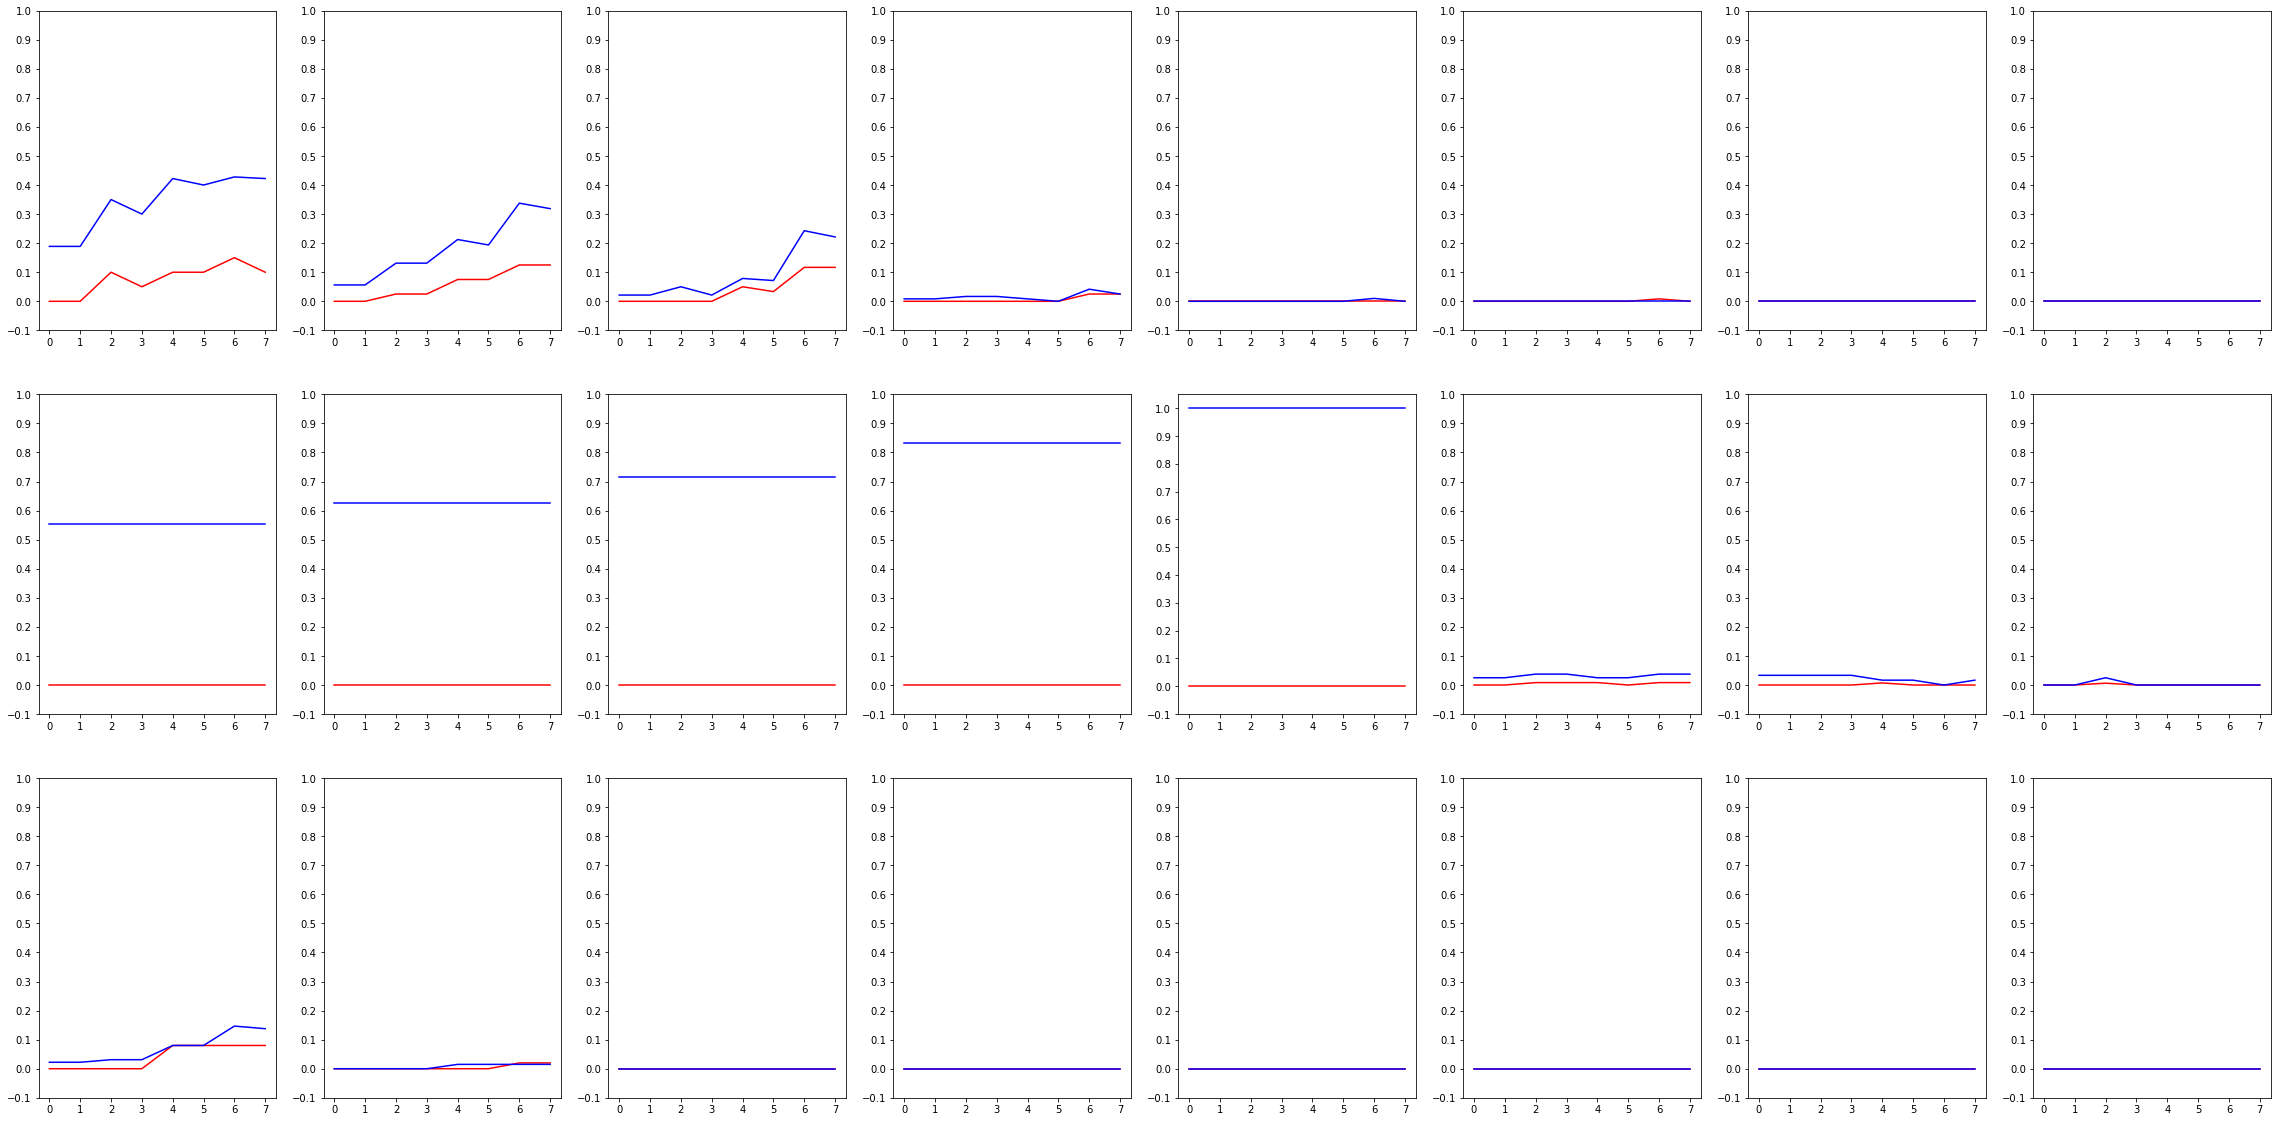

In [18]:
total = 1
for x in totalResults.shape[:-2]:
    total*=x
colInRow = 8
fig, axes = plt.subplots(round(total / colInRow), colInRow, figsize=(40, 20))

i = 0
for datasetResult in totalResults:
    axs = axes[i]
    i+=1
    for ix, ax in enumerate(axs):
        ax.plot(np.array(datasetResult)[ix,:,0], c="red")
        ax.plot(np.array(datasetResult)[ix,:,1], c="blue")
        ax.set_yticks(np.arange(-0.1, 1.05, 0.1))
        ax.set_xticks(np.arange(0, 8, 1))

#### Задание 3
25 объектов классифицированы на 3 класса. 
Написать код на python, который воспроизводит вывод, представленный на картинке
ниже (не используя сторонние библиотеки, кроме numpy)

In [19]:
C="Cat"
F="Fish"
H="Hen"

y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H] # истинные значения
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H] # результат системы
y_true_nC = y_true.count(C)
y_true_nF = y_true.count(F)
y_true_nH = y_true.count(H)
y_pred_nT = len(y_pred)


In [20]:
vars = np.array([C, F, H])
confusion = np.zeros(shape=(3, 3))
for i in range(y_pred_nT):
    for iRow, actualVal in enumerate(vars):
        for iConfusionCell in range(vars.size):
            if y_true[i] == actualVal and y_pred[i] == vars[iConfusionCell]:
                confusion[iRow][iConfusionCell]+=1

In [21]:
def calcP(idx):
    return confusion[idx][idx]/confusion[:, idx].sum()
def calcR(idx):
    return confusion[idx][idx]/confusion[idx, :].sum()
def calcF1(P, R):
    return 2 / ((1 / P) + (1 / R))
def fStr(f):
    return "%.3f"%(f)

In [22]:
idxC, idxF, idxH = 0, 1, 2

cP = calcP(idxC)
fP = calcP(idxF)
hP = calcP(idxH)

cR = calcR(idxC)
fR = calcR(idxF)
hR = calcR (idxH)

cF1 = calcF1(cP, cR)
fF1 = calcF1(fP, fR)
hF1 = calcF1(hP, hR)

n = np.array([y_true_nC, y_true_nF, y_true_nH])
p = np.array([cP, fP, hP])
r = np.array([cR, fR, hR])
f1 = np.array([cF1, fF1, hF1])
Pmean = p.mean()
Rmean = r.mean()
F1mean = f1.mean()

Pwmean = (p * n).sum() / y_pred_nT
Rwmean = (r * n).sum() / y_pred_nT
F1wmean = (f1 * n).sum() / y_pred_nT

accuracy = np.mean(np.array(y_true) == np.array(y_pred))

In [23]:
nColumn, nRow = 5, 8
mx = []
for iRow in range(nRow):
    mx.append([])
    for iCol in range(nColumn):
        mx[iRow].append("")

# header column 
mx[1][0] = C
mx[2][0] = F
mx[3][0] = H

mx[5][0] = "accuracy"
mx[6][0] = "macro avg"
mx[7][0] = "weighted avg"

# header row
mx[0][1] = "precision"
mx[0][2] = "recall"
mx[0][3] = "f1-score"
mx[0][4] = "support"

# collumn precision values
mx[1][1] = fStr(cP)
mx[2][1] = fStr(fP)
mx[3][1] = fStr(hP)

# collumn recall    values
mx[1][2] = fStr(cP)
mx[2][2] = fStr(fP)
mx[3][2] = fStr(hP)

# collumn f1-score  values
mx[1][3] = fStr(cF1)
mx[2][3] = fStr(fF1)
mx[3][3] = fStr(hF1)

# culumn support    values
mx[1][nColumn-1] = str(y_true_nC)
mx[2][nColumn-1] = str(y_true_nF)
mx[3][nColumn-1] = str(y_true_nH)

mx[5][nColumn-1] = str(y_pred_nT)
mx[6][nColumn-1] = str(y_pred_nT)
mx[7][nColumn-1] = str(y_pred_nT)

# row accuracy
mx[5][3] = fStr(accuracy)

# row macro avg
mx[6][1] = fStr(Pmean)
mx[6][2] = fStr(Rmean)
mx[6][3] = fStr(F1mean)

# row weight avg
mx[7][1] = fStr(Pwmean)
mx[7][2] = fStr(Rwmean)
mx[7][3] = fStr(F1wmean)

In [24]:
print(confusion)
print()

colMaxSize = np.zeros(nColumn, dtype=np.int0)
for iCol in range(nColumn):
    for iRow in range(nRow):
        colMaxSize[iCol] = max(len(mx[iRow][iCol]), colMaxSize[iCol])
for row in mx:
    s = ""
    for iCol, cell in enumerate(row):
        s+=f"%{colMaxSize[iCol]}s  "%(cell)
    print(s)

[[4. 1. 1.]
 [6. 2. 2.]
 [3. 0. 6.]]

              precision  recall  f1-score  support  
         Cat      0.308   0.308     0.421        6  
        Fish      0.667   0.667     0.308       10  
         Hen      0.667   0.667     0.667        9  
                                                    
    accuracy                        0.480       25  
   macro avg      0.547   0.511     0.465       25  
weighted avg      0.581   0.480     0.464       25  
